In [4]:
#learning analytics project
#Based on data from Kuzilek J., Hlosta M., Zdrahal Z. Open University Learning Analytics dataset Sci. Data 4:170171 doi: 10.1038/sdata.2017.171 (2017).
#import relevant libraries
import pandas as pd
import pandas_profiling

##read in the different datasets
assessments=pd.read_csv('anonymisedData/assessments.csv')
courses=pd.read_csv('anonymisedData/courses.csv')
studentAssessment=pd.read_csv('anonymisedData/studentAssessment.csv')
studentInfo=pd.read_csv('anonymisedData/studentInfo.csv')
studentRegistration=pd.read_csv('anonymisedData/studentRegistration.csv')
studentVle=pd.read_csv('anonymisedData/studentVle.csv')
vle=pd.read_csv('anonymisedData/vle.csv')

In [53]:
###initial data exploration
pandas_profiling.ProfileReport(studentAssessment)

Number of variables,5
Number of observations,173912
Total Missing (%),0.0%
Total size in memory,6.6 MiB
Average record size in memory,40.0 B
Numeric,4
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [2]:
###create a dictionary that contains overall user engagement (sum of all clicks) per student per course_
studentlist=studentVle.id_student.unique()
user_engagement={}
for currentstudent in studentlist:
    user_engagement[currentstudent]=studentVle.loc[studentVle['id_student']==currentstudent,'sum_click'].sum()

In [3]:
user_engagement

{28400: 1435,
 30268: 281,
 31604: 2158,
 32885: 1034,
 38053: 2445,
 45462: 1492,
 58873: 1732,
 59185: 1102,
 62155: 3388,
 63400: 2737,
 65002: 176,
 70464: 1053,
 71361: 2327,
 75091: 2992,
 57506: 1319,
 77367: 680,
 94961: 1240,
 98094: 2839,
 101781: 4104,
 102806: 1944,
 106577: 733,
 104476: 4777,
 110175: 998,
 114999: 1358,
 111717: 2343,
 116692: 1108,
 127582: 1321,
 129955: 1888,
 132976: 520,
 135335: 73,
 134143: 2732,
 137873: 5528,
 118983: 284,
 123044: 2041,
 144801: 5645,
 146188: 597,
 145130: 452,
 147756: 1718,
 148993: 3812,
 235507: 1257,
 238007: 1935,
 241649: 1892,
 248270: 1969,
 255548: 2580,
 258392: 844,
 256815: 1481,
 258894: 4963,
 241729: 1829,
 242793: 658,
 246834: 1174,
 262934: 2407,
 271251: 3348,
 279572: 1183,
 281250: 130,
 282821: 1961,
 291334: 5231,
 296332: 2152,
 298696: 514,
 300398: 1997,
 287548: 483,
 302302: 513,
 305539: 68,
 306897: 2742,
 306466: 1220,
 307866: 1476,
 312537: 12882,
 312782: 281,
 155854: 4003,
 155550: 1529,
 1

In [4]:
##add the neew variable to the user engagement data frame by first changing dictionrary to dataframe adn then marging the 2 frames
pd_user_engagement=pd.DataFrame(list(user_engagement.items()),columns = ['id_student','clicks'])
result = pd.merge(studentAssessment, pd_user_engagement, how='outer', on=['id_student', 'id_student'])

In [5]:
##save or load the result
#result.to_csv('studentAssessmentWithEnagement',index=False)
result= pd.read_csv('/Users/Kirsten/Documents/GitHub/LearningAnalytics/studentAssessmentWithEnagement')


In [73]:
#initial visualisations of test-result vs. user engagement relationship for data exploration
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

In [75]:
%matplotlib inline
newresult=result.dropna()
#simple linear regression fit
#sns.lmplot(x="clicks", y="score", data=newresult, x_estimator=np.mean,line_kws={"color": "darkblue"});

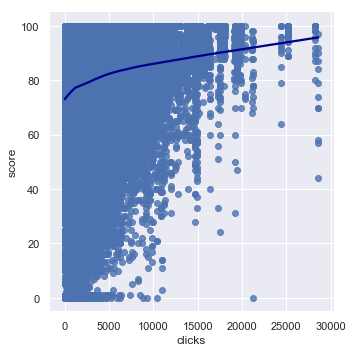

In [27]:
#nonparametric regression
sns.lmplot(x="clicks", y="score", data=newresult,
           lowess=True, line_kws={"color": "darkblue"});


In [8]:
##raincloud plots Allen M, Poggiali D, Whitaker K et al. Raincloud plots: a multi-platform tool for robust data visualization [version 1; peer review: 2 approved]. Wellcome Open Res 2019, 4:63. DOI: 10.12688/wellcomeopenres.15191.1
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
#sns.set(style="darkgrid")
#sns.set(style="whitegrid")
#sns.set_style("white")
sns.set(style="whitegrid",font_scale=2)
import matplotlib.collections as clt

import sys
!{sys.executable} -m pip install ptitprince
import ptitprince as pt

    100% |████████████████████████████████| 1.9MB 4.0MB/s ta 0:00:01
  Running setup.py bdist_wheel for ptitprince ... done
  Stored in directory: /Users/Kirsten/Library/Caches/pip/wheels/0a/f8/51/69b54ac713d656ee1a792a3cd5f33deb742156183882b01c10
Successfully built ptitprince


In [7]:
%matplotlib inline
newresult=result.dropna()

newresult=newresult.drop(newresult[~newresult.id_assessment.isin([1752,1753,1754,1755,1756,1757])].index)


Text(0.5, 1.0, 'Figure P1\n Bar Plot')

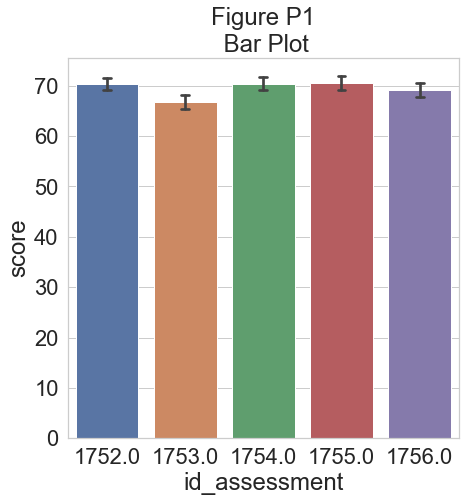

In [35]:
f, ax = plt.subplots(figsize=(7, 7))

sns.barplot(x = "id_assessment", y = "score", data = newresult, capsize= .1)
plt.title("Figure P1\n Bar Plot")

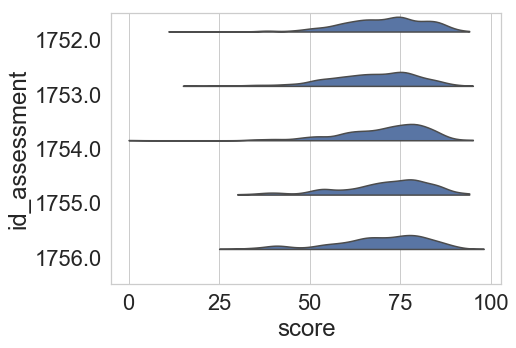

In [36]:
f, ax = plt.subplots(figsize=(7, 5))
dy="id_assessment"; dx="score"; ort="h"; pal = sns.color_palette(n_colors=1)

ax=pt.half_violinplot( x = dx, y = dy, data = newresult, palette = pal, bw = .2, cut = 0.,
                      scale = "area", width = .6, inner = None, orient = ort)

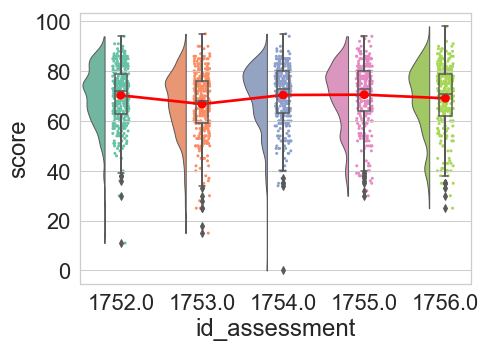

In [39]:

#adding a red line connecting the groups' mean value (useful for longitudinal data)
dx="id_assessment"; dy="score"; ort="v"; pal = "Set2"; sigma = .2
f, ax = plt.subplots(figsize=(7, 5))

ax=pt.RainCloud(x = dx, y = dy, data = newresult, palette = pal, bw = sigma,
                 width_viol = .6, ax = ax, orient = ort,
               pointplot = True)

In [ ]:
#J. van Langen. (2020). Open-visualizations in R and Python. Zenodo. 
#http://doi.org/10.5281/zenodo.3715576

In [32]:
newresult['score'].head()


0    78.0
1    85.0
2    80.0
3    85.0
4    82.0
Name: score, dtype: float64

In [53]:
assessment1752=newresult[newresult.id_assessment==1752.0]
assessment1753=newresult[newresult.id_assessment==1753.0]
assessment1754=newresult[newresult.id_assessment==1754.0]
assessment1755=newresult[newresult.id_assessment==1755.0]
assessment1756=newresult[newresult.id_assessment==1756.0]

In [63]:
assessment1752.rename(columns={"score": "1752score"}, inplace=True)
merged_assessment =pd.merge(assessment1752, assessment1753[['id_student','score']], on='id_student')
merged_assessment.rename(columns={"score": "1753score"}, inplace=True)
merged_assessment =pd.merge(merged_assessment, assessment1754[['id_student','score']], on='id_student')
merged_assessment.rename(columns={"score": "1754score"}, inplace=True)
merged_assessment =pd.merge(merged_assessment, assessment1755[['id_student','score']], on='id_student')
merged_assessment.rename(columns={"score": "1755score"}, inplace=True)
merged_assessment =pd.merge(merged_assessment, assessment1756[['id_student','score']], on='id_student')
merged_assessment.rename(columns={"score": "1756score"}, inplace=True)

In [64]:
merged_assessment.head()

,id_assessment,id_student,date_submitted,is_banked,1752score,clicks,1753score,1754score,1755score,1756score
0,1752.0,11391,18.0,0.0,78.0,934.0,85.0,80.0,85.0,82.0
1,1752.0,28400,22.0,0.0,70.0,1435.0,68.0,70.0,64.0,60.0
2,1752.0,31604,17.0,0.0,72.0,2158.0,71.0,74.0,88.0,75.0
3,1752.0,32885,26.0,0.0,69.0,1034.0,30.0,63.0,35.0,75.0
4,1752.0,38053,19.0,0.0,79.0,2445.0,69.0,74.0,50.0,68.0


In [86]:
###visualisation est case for only two of the assessement
scores_only=merged_assessment[['1752score','1753score']]#,'1754score','1755score','1756score']]
#Set the amount of jitter and create a dataframe containing the jittered x-axis values
jitter_2 = 0.05
np.random.seed(3)
df_jitter_2 = pd.DataFrame(np.random.normal(loc=0, scale=jitter_2, size=scores_only.values.shape), columns=scores_only.columns)
#Update the dataframe with adding a number based on the length on the columns. Otherwise all datapoints would be at the same x-axis location.
df_jitter_2 += np.arange(len(scores_only.columns))


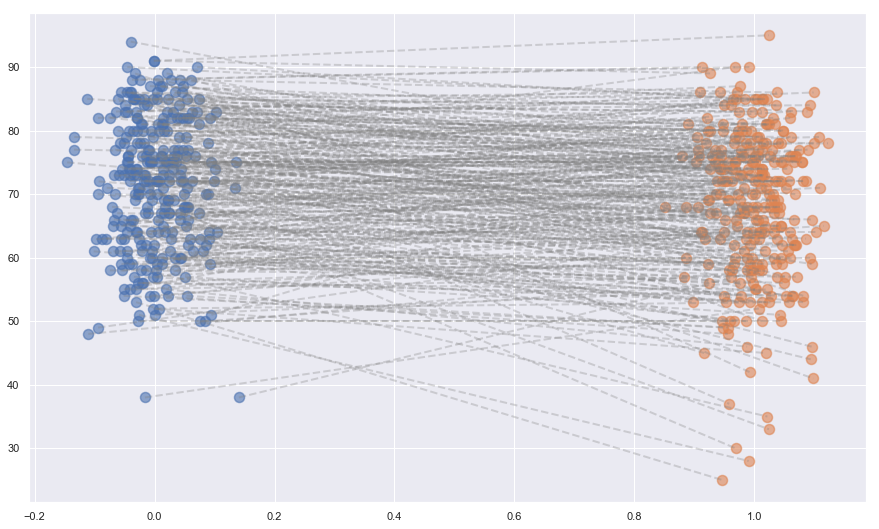

In [88]:
#Visualisation connecting individual students data points on two different tests
# Define pre-settings
w = 6
h = 6
title_size = 20
xlab_size = 15
ylab_size = 20
fig, ax = plt.subplots(figsize=(15,9))
labels = ['1752score', '1753score']
for col in scores_only:
    ax.plot(df_jitter_2[col], scores_only[col], 'o', alpha=.6, zorder=2, ms=10, mew=1.5)

for idx in scores_only.index:
    ax.plot(df_jitter_2.loc[idx,['1752score','1753score']], scores_only.loc[idx,['1752score','1753score']], color = 'gray', linewidth = 2, linestyle = '--',alpha = .3)    
    
    #Additonal settings
   # ax.set_xticks(range(len(scores_only.columns)))
   # ax.set_xticklabels((labels), size= xlab_size)
   # ax.set_xlim(-1, len(scores_only.columns))
   # ax.set_ylabel('Value', size = ylab_size)
   # ax.set_title('Figure 3: individual datapoints with lines and jitter', size = title_size)
   # sns.despine()